# Example data analysis for gene counting

This notebook will illustrate the approaches to constructing a histogram with the necessary structure to extract informaiton on demand for further analysis.

**Input:** An ordered list is provided, for which the line number (or array index) corresponds to the gene ID, and the value at that index correponds to the number of counts for that gene

**Output:** We'd like to construct a histogram of the raw data which plots the number of counts per gene on the X-axis and the number of genes with that count on the Y-axis (genes vs. counts per gene). We'd like to be able to see extract the amplitude of the histogram for a given count.

## Import the necessary Python packages

`NumPy` for analysis, `matplotlib` for plotting, and `csv` for efficiently reading the Excel file.

*Note:* The `%matplotlib inline` command is a special `magic` command for use with IPython notebooks. It allows for the plots to rendered within the notebook using the matplotlib backend, which I find to be convenient. It's not required, and it should be removed if you are planning on running a standalone script.

In [1]:
%matplotlib inline
import csv
import numpy as np
from matplotlib import pyplot as plt

## Import the data

In [2]:
datafile = 'Practice_Library.csv'
with open(datafile, 'rU') as f:
    data_iter = csv.reader(f, dialect=csv.excel_tab)
    #for row in data_iter:
    #    print ', '.join(row)
    raw_data = [data for data in data_iter]
    
#Cast the Python array as a flattened NumPy array with integer values
data_array = np.asarray(raw_data).astype(int).flatten()

## Construct a histogram to view the data

There are a couple ways to construct histograms in Python using Matplotlib. One is quicker and automatically produces a decent plot, but the second is more useful if you want to analyze the data or change the way its being displayed.

#### 1. Quick and dirty histogram

(0, 600)

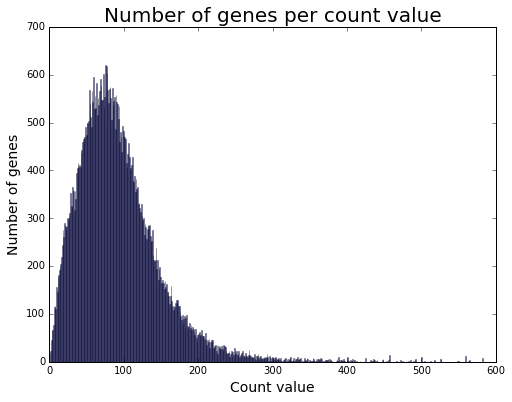

In [3]:
numBins = np.max(data_array)
fig1 = plt.figure(figsize=(8,6))
ax = fig1.gca()
ax.hist(data_array,numBins,color='blue',alpha=0.4)

ax.set_xlabel("Count value", fontsize=14)
ax.set_ylabel("Number of genes", fontsize=14)
ax.set_title("Number of genes per count value", fontsize=20)

ax.set_xlim([0,600])

#### 2. More rigorous histogram - plotted as a line plot

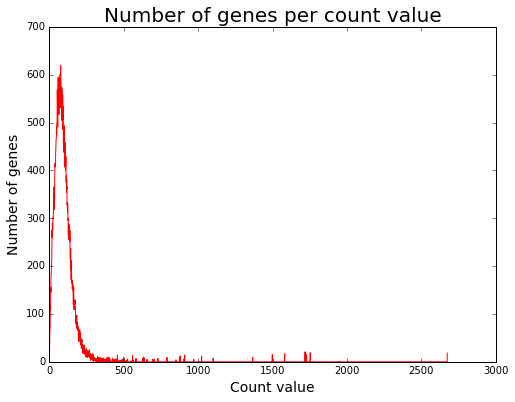

In [4]:
numBins = np.max(data_array)
myVals, myBins = np.histogram(data_array,numBins)
bincenters = 0.5*(myBins[1:]+myBins[:-1])
bin_width = 1.0*(myBins[1]-myBins[0])
#normalize
myVals_norm = myVals/(np.max(myVals)*1.0)
    
fig2 = plt.figure(figsize=(8,6))
ax = fig2.gca()
    
ax.set_xlabel("Count value", fontsize=14)
ax.set_ylabel("Number of genes", fontsize=14)
ax.set_title("Number of genes per count value", fontsize=20)

ax.plot(bincenters, myVals, c='r')

Here they are combined on the same plot.

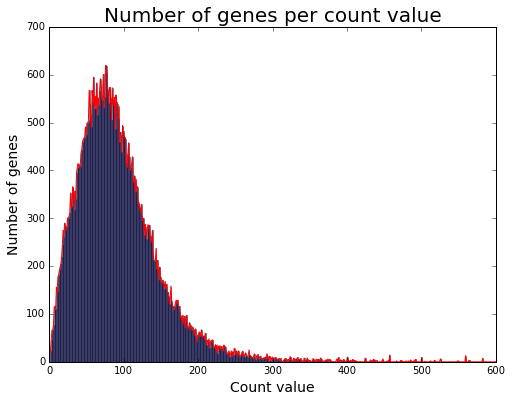

In [5]:
fig3 = plt.figure(figsize=(8,6))
ax = fig3.gca()
    
ax.set_xlabel("Count value", fontsize=14)
ax.set_ylabel("Number of genes", fontsize=14)
ax.set_title("Number of genes per count value", fontsize=20)

ax.set_xlim([0,600])

ax.hist(data_array,numBins,color='blue',alpha=0.4)
ax.plot(bincenters, myVals, c='r')

## Create a different array of "counts"

This will make it easy to determine the number of genes corresponding to a given count without using a histogram.

In [6]:
genes_per_count = []
max_count = np.max(data_array)
for val in range(max_count):
    num_vals = len(np.where(data_array==val)[0])
    genes_per_count.append(num_vals)

The array `genes_per_count` now contains all of the same information as the histogram, only its more sensibly indexed so that one can do a simple lookup. That is, the command `genes_per_count[num]` tells us how many genes share a count # of num.

In [7]:
num = 20
genes = genes_per_count[num]
print "{} genes have a count of {}".format(genes, num)

290 genes have a count of 20


We can replot this to illustrate that this array does in fact reproduce the same data as the histograms above.

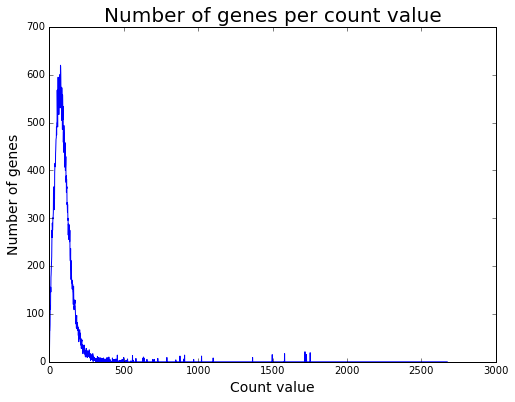

In [8]:
fig4 = plt.figure(figsize=(8,6))
ax = fig4.gca()

ax.plot(range(max_count),genes_per_count)

ax.set_xlabel("Count value", fontsize=14)
ax.set_ylabel("Number of genes", fontsize=14)
ax.set_title("Number of genes per count value", fontsize=20)